<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Keys" data-toc-modified-id="Keys-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Keys</a></span></li><li><span><a href="#Isolating-the-mutations-enriched-in-exons,-cds,-utr's" data-toc-modified-id="Isolating-the-mutations-enriched-in-exons,-cds,-utr's-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Isolating the mutations enriched in exons, cds, utr's</a></span><ul class="toc-item"><li><span><a href="#Observed-distribution" data-toc-modified-id="Observed-distribution-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Observed distribution</a></span></li><li><span><a href="#Distribution-of-the-locations-of-simulated-mutations-across-the-genome" data-toc-modified-id="Distribution-of-the-locations-of-simulated-mutations-across-the-genome-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Distribution of the locations of simulated mutations across the genome</a></span></li><li><span><a href="#Plots" data-toc-modified-id="Plots-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Plots</a></span></li></ul></li><li><span><a href="#Helper-Functions" data-toc-modified-id="Helper-Functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Helper Functions</a></span><ul class="toc-item"><li><span><a href="#Gene-names-and-positions" data-toc-modified-id="Gene-names-and-positions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Gene names and positions</a></span></li><li><span><a href="#Identifying-differentially-expressed-genes-(DEGs)" data-toc-modified-id="Identifying-differentially-expressed-genes-(DEGs)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Identifying differentially expressed genes (DEGs)</a></span></li><li><span><a href="#Isolate-observed-mutations" data-toc-modified-id="Isolate-observed-mutations-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Isolate observed mutations</a></span></li></ul></li><li><span><a href="#Finding-potential-cis-mutations" data-toc-modified-id="Finding-potential-cis-mutations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Finding potential <i>cis</i> mutations</a></span><ul class="toc-item"><li><span><a href="#Script-can-be-found-&quot;scripts/cis_mutations.py&quot;" data-toc-modified-id="Script-can-be-found-&quot;scripts/cis_mutations.py&quot;-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Script can be found "scripts/cis_mutations.py"</a></span></li><li><span><a href="#Plots" data-toc-modified-id="Plots-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Plots</a></span></li><li><span><a href="#P-value-distribution" data-toc-modified-id="P-value-distribution-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span><i>P</i> value distribution</a></span></li></ul></li><li><span><a href="#Distribution-of-the-expression-change-of-potential-cis-mutations" data-toc-modified-id="Distribution-of-the-expression-change-of-potential-cis-mutations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Distribution of the expression change of potential <i>cis</i> mutations</a></span></li></ul></div>

# Keys

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from Bio import SeqIO
import random, glob
import json
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.ticker import MaxNLocator
from matplotlib.gridspec import GridSpec
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import mannwhitneyu
stats.junk = lambda chisq, df: stats.chi2.sf(chisq, df)
import csv
import gffpandas.gffpandas as gffpd
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

CC2344 = ["CC2344-L1", "CC2344-L2", "CC2344-L3", "CC2344-L4", "CC2344-L5", "CC2344-L6", "CC2344-L7", "CC2344-L8", "CC2344-L9", "CC2344-L10", "CC2344-L11", "CC2344-L12", "CC2344-L13", "CC2344-L14", "CC2344-L15"]
CC2931 = ["CC2931-L1", "CC2931-L2", "CC2931-L3", "CC2931-L4", "CC2931-L5", "CC2931-L6", "CC2931-L7", "CC2931-L9", "CC2931-L10", "CC2931-L11", "CC2931-L13", "CC2931-L14", "CC2931-L15"]

#### Dataframe recording the generation time per sample ####
dic_gen = {}
generation = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/Mutation_Fitness.txt', delimiter = '\t')
generation['Sample'] = generation['Sample'].str.replace('_', '-L')
generation = generation.loc[generation['Sample'].isin(CC2344 + CC2931)]

for i in generation.index.values:
    dic_gen[generation.at[i,'Sample']] = generation.at[i, 'Generation']
generations = pd.Series(dic_gen)

#### Dataframe recording the number of mutations per sample ####
mutations = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/all_mutations.csv', delimiter = '\t')
dic_mut = {maline:mutations.loc[mutations['sample'] == maline].count()[0] for maline in mutations['sample'].values.tolist()}

# Isolating the mutations enriched in exons, cds, utr's

## Observed distribution 

(array([0, 1, 2, 3]),
 [Text(0, 0, 'CDS'),
  Text(1, 0, 'intron'),
  Text(2, 0, 'three_prime_UTR'),
  Text(3, 0, 'five_prime_UTR')])

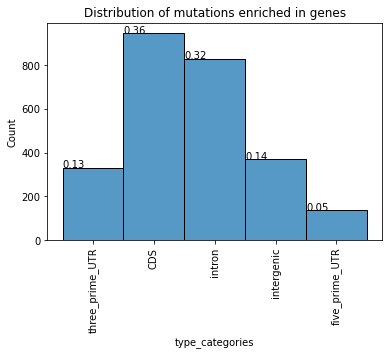

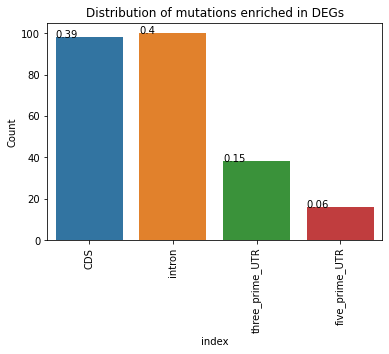

In [34]:
CC2344 = ["CC2344-L1", "CC2344-L2", "CC2344-L3", "CC2344-L4", "CC2344-L5", "CC2344-L6", "CC2344-L7", "CC2344-L8", "CC2344-L9", "CC2344-L10", "CC2344-L11", "CC2344-L12", "CC2344-L13", "CC2344-L14", "CC2344-L15"]
CC2931 = ["CC2931-L1", "CC2931-L2", "CC2931-L3", "CC2931-L4", "CC2931-L5", "CC2931-L6", "CC2931-L7", "CC2931-L9", "CC2931-L10", "CC2931-L11", "CC2931-L13", "CC2931-L14", "CC2931-L15"]

DEGs = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/total_genes1.csv', delimiter = ',').reset_index()
DEGs = pd.melt(DEGs, id_vars = ['index'], value_vars = CC2344 + CC2931).dropna()

### Identifying the location of mutations within genes ####
mutations = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/all_mutations.csv', delimiter = '\t')
mutations['type'] = 'intron'
mutations['type_categories'] = 'intron'

annotation = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/annotation/edited_v6_annotation.csv', delimiter = '\t')

for i in mutations.index.values:
    if mutations.at[i, 'gene'] == 'intergenic':
        mutations.at[i, 'type'] = 'intergenic'
        mutations.at[i, 'type_categories'] = 'intergenic'
    else:
        section = annotation.loc[annotation['genename'] == mutations.at[i, 'gene']]
        exon = section.loc[section['type'] == 'exon']
        for a in exon.index.values:
            if exon.at[a, 'start'] <= mutations.at[i, 'start'] and mutations.at[i, 'end'] <= exon.at[a, 'end']:
                mutations.at[i, 'type'] = 'exon'
        five_prime_UTR = section.loc[section['type'] == 'five_prime_UTR']
        for a in five_prime_UTR.index.values:
            if five_prime_UTR.at[a, 'start'] <= mutations.at[i, 'start'] and mutations.at[i, 'end'] <= five_prime_UTR.at[a, 'end']:
                mutations.at[i, 'type_categories'] = 'five_prime_UTR'
        three_prime_UTR = section.loc[section['type'] == 'three_prime_UTR']
        for a in three_prime_UTR.index.values:
            if three_prime_UTR.at[a, 'start'] <= mutations.at[i, 'start'] and mutations.at[i, 'end'] <= three_prime_UTR.at[a, 'end']:
                mutations.at[i, 'type_categories'] = 'three_prime_UTR'
        cds = section.loc[section['type'] == 'CDS']
        for a in cds.index.values:
            if cds.at[a, 'start'] <= mutations.at[i, 'start'] and mutations.at[i, 'end'] <= cds.at[a, 'end']:
                mutations.at[i, 'type_categories'] = 'CDS'
mutations.to_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/mutation_enriched_regions.csv', sep = '\t', header = True, index = False)

#### Distribution of mutations enriched in degs ####
enriched_DEGs = pd.DataFrame()
for i in CC2344 + CC2931:
    sample = DEGs.loc[DEGs['variable'] == i]['value'].values.tolist()
    spec_mut = mutations.loc[(mutations['gene'].isin(sample)) & (mutations['sample'] == i)]
    enriched_DEGs[i] = spec_mut['type_categories'].value_counts()
enriched_DEGs = enriched_DEGs.replace(np.nan, 0, regex = True)
enriched_DEGs['sum'] = enriched_DEGs.sum(axis = 1)

#### Plots ####
ax = sns.histplot(data = mutations, x = 'type_categories')
for p in ax.patches:
    txt = p.get_height()
    x = p.get_x()
    y = p.get_height()
    ax.text(x, y, str((txt/2613).round(2)))
plt.title('Distribution of mutations enriched in genes')
plt.xticks(rotation=90)

plt.figure()
ax1 = sns.barplot(data = enriched_DEGs.reset_index(), x = 'index', y = 'sum')
for a in ax1.patches:
    txt = a.get_height()
    x = a.get_x()
    y = a.get_height()
    ax1.text(x, y, str((txt/enriched_DEGs['sum'].sum()).round(2)))
plt.ylabel('Count')
plt.title('Distribution of mutations enriched in DEGs')
plt.xticks(rotation=90)

## Distribution of the locations of simulated mutations across the genome

The complete list of observed mutations were simulated in 1000 trials and their location in the genome was assigned

In [40]:
CC2344 = ["CC2344-L1", "CC2344-L2", "CC2344-L3", "CC2344-L4", "CC2344-L5", "CC2344-L6", "CC2344-L7", "CC2344-L8", "CC2344-L9", "CC2344-L10", "CC2344-L11", "CC2344-L12", "CC2344-L13", "CC2344-L14", "CC2344-L15"]
CC2931 = ["CC2931-L1", "CC2931-L2", "CC2931-L3", "CC2931-L4", "CC2931-L5", "CC2931-L6", "CC2931-L7", "CC2931-L9", "CC2931-L10", "CC2931-L11", "CC2931-L13", "CC2931-L14", "CC2931-L15"]

distribution = pd.DataFrame()

#### Importing degs ####
DEGs = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/total_genes1.csv', delimiter = ',').reset_index()
DEGs = pd.melt(DEGs, id_vars = ['index'], value_vars = CC2344 + CC2931).dropna()

#### Importing the annotation of genes in version 6 reference genome ####
type_gene = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/annotation/v6_genes.csv', delimiter = '\t')
annotation = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/annotation/edited_v6_annotation.csv', delimiter = '\t')

#### Importing the total number of bases per chromosome ####
base_counts = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/chrom_base_count', skiprows=2, delimiter = '\t', index_col = 'chromosome')

### Importing all mutations per MA sample ####
mutations = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/all_mutations.csv', delimiter = '\t')
mutations['type'] = 'intron'
mutations['type_categories'] = 'intron'

for trials in range(1,3):
    #### Creating simulated mutations ####
    simulated_mutations = mutations
    simulated_mutations['gene'] = 'intergenic'
    simulated_mutations['gene_start'] = np.nan
    simulated_mutations['gene_end'] = np.nan

    #### Randomly choosing mutations across the genome ####
    for b in simulated_mutations.index.values:
        chrom = np.random.choice(list(base_counts.index.values), 1, replace = True)
        location = np.random.randint(1, base_counts.at[chrom[0], 'base_counts'])
        simulated_mutations.at[b, 'chromosome'] = chrom[0]
        simulated_mutations.at[b, 'start'] = location
        simulated_mutations.at[b, 'end'] = location + 1

    #### Finding the location of each mutation ####
    for i in list(simulated_mutations.index.values):
        spec_chrom = type_gene.loc[type_gene['seq_id'] == simulated_mutations.at[i, 'chromosome']]
        spec_chrom = spec_chrom.loc[(spec_chrom['start'] <= simulated_mutations.at[i, 'start']) & (spec_chrom['end'] >= simulated_mutations.at[i, 'start'])]
        if len(spec_chrom) != 0:
            simulated_mutations.at[i, 'gene'] = spec_chrom['attributes'].values[0]
            simulated_mutations.at[i, 'gene_start'] = spec_chrom['start'].values[0]
            simulated_mutations.at[i, 'gene_end'] = spec_chrom['end'].values[0]
        if simulated_mutations.at[i, 'gene'] == 'intergenic':
            simulated_mutations.at[i, 'gene_start'] = mutations.at[i, 'start']
            simulated_mutations.at[i, 'gene_end'] = mutations.at[i, 'end']

    for i in simulated_mutations.index.values:
        if simulated_mutations.at[i, 'gene'] == 'intergenic':
            simulated_mutations.at[i, 'type'] = 'intergenic'
            simulated_mutations.at[i, 'type_categories'] = 'intergenic'
        else:
            section = annotation.loc[annotation['genename'] == simulated_mutations.at[i, 'gene']]
            exon = section.loc[section['type'] == 'exon']
            for a in exon.index.values:
                if exon.at[a, 'start'] <= simulated_mutations.at[i, 'start'] and simulated_mutations.at[i, 'end'] <= exon.at[a, 'end']:
                    simulated_mutations.at[i, 'type'] = 'exon'
            five_prime_UTR = section.loc[section['type'] == 'five_prime_UTR']
            for a in five_prime_UTR.index.values:
                if five_prime_UTR.at[a, 'start'] <= simulated_mutations.at[i, 'start'] and simulated_mutations.at[i, 'end'] <= five_prime_UTR.at[a, 'end']:
                    simulated_mutations.at[i, 'type_categories'] = 'five_prime_UTR'
            three_prime_UTR = section.loc[section['type'] == 'three_prime_UTR']
            for a in three_prime_UTR.index.values:
                if three_prime_UTR.at[a, 'start'] <= simulated_mutations.at[i, 'start'] and simulated_mutations.at[i, 'end'] <= three_prime_UTR.at[a, 'end']:
                    simulated_mutations.at[i, 'type_categories'] = 'three_prime_UTR'
            cds = section.loc[section['type'] == 'CDS']
            for a in cds.index.values:
                if cds.at[a, 'start'] <= simulated_mutations.at[i, 'start'] and simulated_mutations.at[i, 'end'] <= cds.at[a, 'end']:
                    simulated_mutations.at[i, 'type_categories'] = 'CDS'
    simulated_mutations['simulations'] = 'simulated_' + str(trials)
    distribution = pd.concat([distribution, simulated_mutations], axis = 0)
distribution.to_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/cis_mutations/distribution_simulated_mutations_enriched_regions.csv', sep = '\t', index = True, header = True)

## Plots

<AxesSubplot:xlabel='variable', ylabel='value'>

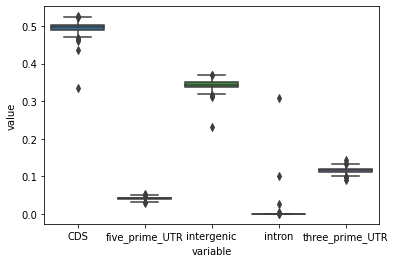

In [36]:
stats = pd.DataFrame(columns = ['CDS', 'five_prime_UTR', 'intergenic', 'intron', 'three_prime_UTR'])

#### PLOTS ####
distribution = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/cis_mutations/distribution_simulated_mutations_enriched_regions.csv', delimiter = '\t', index_col = 'Unnamed: 0').reset_index()
for i in range(1, 1001):
    a = distribution.loc[distribution['simulations'] == 'simulated_' + str(i)].groupby('type_categories')['index'].count()
    for b in a.index.values:
        stats.at['simulated_' + str(i), b] = a[b]/a.sum()
    
stats = stats.replace(np.nan, 0)
stats = stats.reset_index()
stats = pd.melt(stats, id_vars = ['index'], value_vars = stats.columns)
sns.boxplot(stats, x = 'variable', y = 'value')

# Helper Functions

In [3]:
import re
from collections import OrderedDict

############################################################################################################################################
class GFF_line:
	"""This class basically parses a GFF line and allows you to interact with different components that I have deemed interesting
	Most components are simple strings or intgers.
	The attributes field which is a ;-separated list is returned as a dictionary """
	def __init__(self, l, info_delimiter=";", info_field_delimiter = '='):
		self.seqid, self.source, self.type, self.start, self.end, self.score, self.strand, self.phase, self.attribs = l.split('\t')
		self.attributes = self.attribute_dict(self.attribs, info_delimiter, info_field_delimiter)
		self.start = int(self.start)
		self.end = int(self.end)
		self.line = l
	def attribute_dict(self, attributes, info_delimiter=";", info_field_delimiter = '='): ###this is fragile
		d = OrderedDict()
		attributes = attributes.strip(info_delimiter)
		for i in [x.strip() for x in re.split(info_delimiter, attributes)]:
			if len(i)>0:
				field = re.split(info_field_delimiter, i)[0]
				d[field] = re.split(info_field_delimiter, i)[1].strip('"')
		return d
	def retrieve_sequence(self, ref_dict, reverse_complement=False):
		seq = str(ref_dict[self.seqid].seq[self.start-1: self.end])
		if reverse_complement:
			seq = reverse_complement(seq)
		return seq

def randomDEGs(genes, nDEGs):
    random_DEGs = random.choices(list(genes.keys()), k=nDEGs)
    return random_DEGs

def nearest_mutation(DEG, genes, gene_bounds, muts):
    """
    #set DEGs with mutations in them as 0
    #otherwise use the minimum absolute distance to the genes flank

    DEG= gene name
    genes = a look up table of where genes are
    gene_bounds = a look up table of the chromosome position where a gene is
    muts = a dictionary of mutations keyed by chromosome
    """
    if genes[DEG] == 'contig':
        return None
    else:
        c = genes[DEG]
        bounds = gene_bounds[c][DEG]
        min_distance = 1e9 #set to some huge number bigger than the whole genome
        if c not in muts:
            return None
        for p in muts[c]: # for this DEG we will check its distance to every mutation
            if bounds[0]< p <bounds[1]: #if its in the gene
                min_distance = 1 # set to one - you can use 0 but it messes with log scales
                return min_distance #you're done
            current_distance = min(abs(p-bounds[0]),abs(p-bounds[1])) #the nearest distance of this DEG to this mutation is the min of its flanks absolute distance 
            if current_distance < min_distance: # if this current min is closer than the running min then set it has the new running min
                min_distance = current_distance
    return min_distance

## Gene names and positions

In [4]:
GFF_file  = "/research/references/chlamydomonas/6.0_chlamy/CC4532.v1_1.gene_exons.gff3"

gene_types = ['gene', 'transposable_element_gene', 'tRNA', 'group_II_intron', 'rRNA', 'group_I_intron','ncRNA']
genes ={}
gene_bounds = {}

for l in open(GFF_file):
    if l.startswith("#"):continue
    g = GFF_line(l)
    if 'contig' in g.seqid: 
        ID = g.attributes['ID']
        genes[ID] = 'contig'
    if g.type in gene_types:
        ID = g.attributes['ID']
        if g.seqid in gene_bounds: gene_bounds[g.seqid][ID] = [g.start, g.end]
        else:
            gene_bounds[g.seqid] = {ID:[g.start, g.end]}
        genes[ID] = g.seqid

## Identifying differentially expressed genes (DEGs)

In [5]:
import glob
DEG_folder = "/research/projects/chlamydomonas/MAexpression/analysis/genes_log2fold"

deg_files = glob.glob(DEG_folder+"/CC*-L*") 
obs_DEGs = {}
for f in deg_files:
    ma_line = f.split("/")[-1]
    obs_DEGs[ma_line] = []
    #print(ma_line)
    for l in open(f).readlines()[1:]:
        gene, baseMean,log2FoldChange,lfcSE,stat,pvalue,padj = l.strip().split("\t")
        try:
            padj = float(padj)
            if padj < 0.05:
                obs_DEGs[ma_line].append(gene)
                #could apply other filters here - ie strong down regulation
#                 if abs(float(log2FoldChange)) > 2.0:
#                     obs_DEGs[ma_line].append(gene)
        except:
            pass
            #print(l.strip())

            
for i in obs_DEGs:
    print(i, len(obs_DEGs[i]))

CC2344-L1 3232
CC2344-L15 3136
CC2344-L2 226
CC2344-L3 40
CC2344-L4 2049
CC2344-L5 185
CC2344-L6 2543
CC2344-L7 42
CC2344-L8 44
CC2344-L9 4568
CC2931-L1 1553
CC2931-L10 184
CC2931-L11 2063
CC2931-L13 601
CC2931-L14 1777
CC2931-L15 2715
CC2931-L2 595
CC2931-L3 344
CC2931-L4 1347
CC2931-L5 988
CC2931-L6 2984
CC2931-L7 338
CC2931-L9 340
CC2344-L10 1352
CC2344-L11 4289
CC2344-L12 1752
CC2344-L13 63
CC2344-L14 36


## Isolate observed mutations

In [6]:
mutations_file  = "/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/v6_coordinates.bed"

obs_mutations = {}
for l in open(mutations_file):
    c,s,e,ma_line =l.strip().split()
    ma_line = "-L".join(ma_line.split("_"))
    if ma_line not in obs_mutations:obs_mutations[ma_line] = {c:[int(e)]}
    elif c not in obs_mutations[ma_line]:obs_mutations[ma_line][c] = [int(e)]
    else:obs_mutations[ma_line][c].append(int(e))
    
for ma_line in obs_mutations:
    print(ma_line, sum([len(obs_mutations[ma_line][c]) for c in obs_mutations[ma_line]]))

CC2931-L12 179
CC2931-L14 79
CC2931-L7 73
CC2931-L2 124
CC2931-L4 100
CC2931-L5 339
CC2931-L13 97
CC2931-L1 89
CC2931-L15 141
CC2931-L3 52
CC2931-L9 112
CC2931-L10 87
CC2931-L11 88
CC2931-L6 85
CC2344-L12 74
CC2344-L14 46
CC2344-L5 69
CC2344-L6 39
CC2344-L1 398
CC2344-L10 59
CC2344-L4 24
CC2344-L13 49
CC2344-L2 81
CC2344-L8 75
CC2344-L15 53
CC2344-L7 45
CC2344-L3 63
CC2344-L9 27
CC2344-L11 45


# Finding potential <i>cis</i> mutations

## Script can be found "scripts/cis_mutations.py"

In [75]:
for f in [100]: 
    n_sims = 10000
    bins = [0] + [10**i for i in range(1,8)]
    flank_region = f 
    total_sim_ds = []
    total_obs_ds = []
    significant= 0
    for ma_line in obs_DEGs.keys():
        DEGs = obs_DEGs[ma_line]
        muts = obs_mutations[ma_line]
        obs_distances = [nearest_mutation(d, genes, gene_bounds, muts) for d in DEGs]
        fraction_in_flank = 0
        for i in obs_distances:
            if i != None:
                if i < flank_region:fraction_in_flank+=1
        n=0
        sim_distances = []
        closer_than_obs = 0
        while n < n_sims:
            simDEGs = randomDEGs(genes, len(DEGs))
            these_sim_distances = [nearest_mutation(d, genes, gene_bounds, muts) for d in simDEGs]
            sim_distances = sim_distances+these_sim_distances
            sim_fraction_in_flank = 0
            for i in these_sim_distances:
                if i != None:
                    if i < flank_region:
                        sim_fraction_in_flank+=1
            if sim_fraction_in_flank > fraction_in_flank:closer_than_obs+=1
            n+=1
            print(len(sim_distances))
        title_line = "{} DEGs: {}, muts: {}, p-value={}".format(ma_line, len(DEGs), len(muts), closer_than_obs/n)
        if closer_than_obs/n <=0.05: significant +=1
        print(title_line)
        plt.figure()
        sns.histplot(sim_distances, stat="density", log_scale=True, bins=25).set(title=title_line)
        sns.histplot(obs_distances, stat="density", log_scale=True, color='red', bins=25)
        total_sim_ds +=sim_distances
        total_obs_ds +=obs_distances

    sim_fraction_in_flank = 0
    for i in total_sim_ds:
        if i != None:
            if i < flank_region:
                sim_fraction_in_flank+=1
    print(fraction_in_flank/len(obs_distances), sim_fraction_in_flank/len(total_sim_ds))
    print(f, "Significant MA lines = ", significant )

## Plots

1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

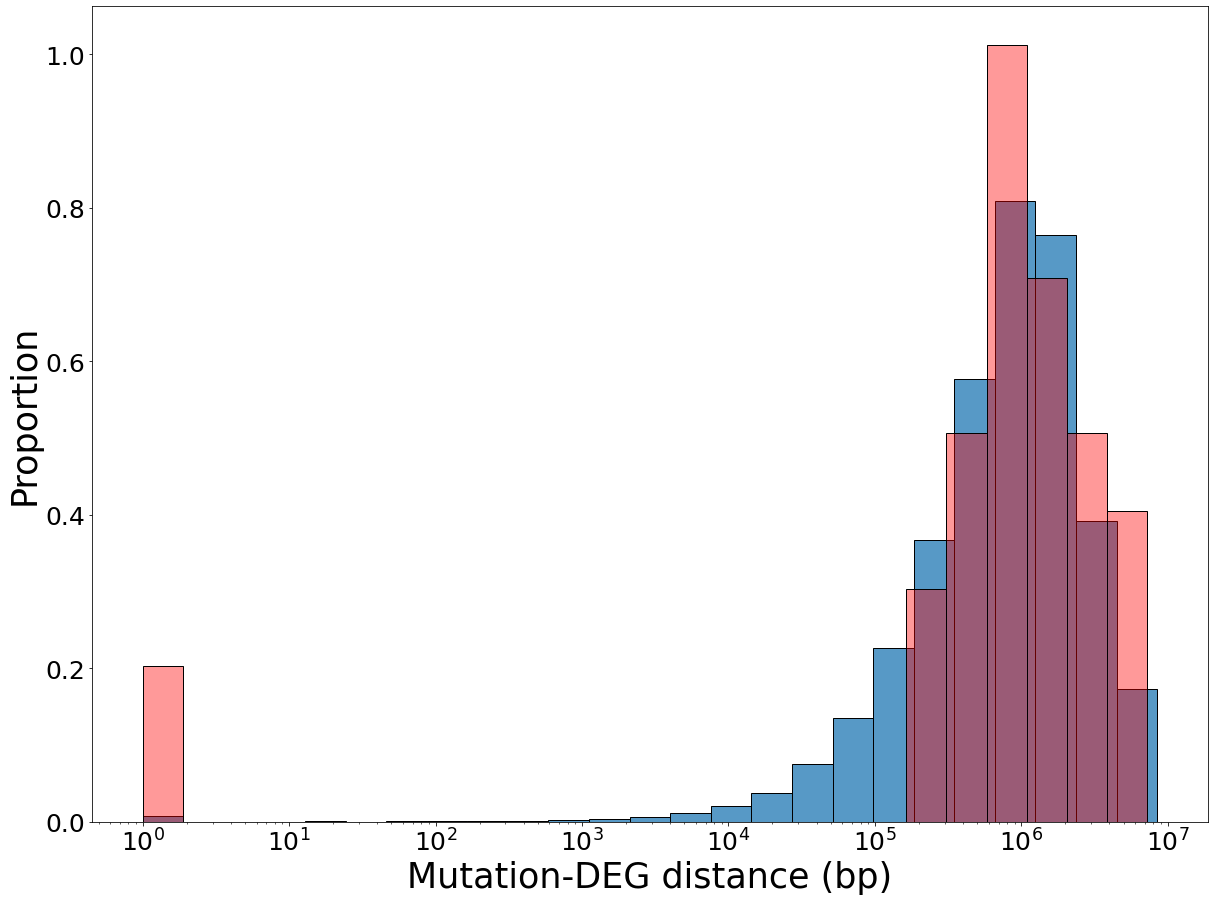

In [7]:
CC2931 = ["CC2931-L1", "CC2931-L2", "CC2931-L3", "CC2931-L4", "CC2931-L5", "CC2931-L6", "CC2931-L7", "CC2931-L9", "CC2931-L10", "CC2931-L11", "CC2931-L13", "CC2931-L14", "CC2931-L15"]
CC2344 = ["CC2344-L1", "CC2344-L2", "CC2344-L3", "CC2344-L4", "CC2344-L5", "CC2344-L6", "CC2344-L7", "CC2344-L8", "CC2344-L9", "CC2344-L10", "CC2344-L11", "CC2344-L12", "CC2344-L13", "CC2344-L14", "CC2344-L15"]

p_value = pd.DataFrame()

for f in [100]: 
    n_sims = 10000
    bins = [0] + [10**i for i in range(1,8)]
    flank_region = f 
    total_sim_ds = []
    total_obs_ds = []
    significant= 0
    for ma_line in ['CC2344-L14']:
        DEGs = obs_DEGs[ma_line]
        muts = obs_mutations[ma_line]
        obs_distances = [nearest_mutation(d, genes, gene_bounds, muts) for d in DEGs]
        fraction_in_flank = 0
        for i in obs_distances:
            if i != None:
                if i < flank_region:fraction_in_flank+=1
        n=0
        sim_distances = []
        closer_than_obs = 0
        while n < n_sims:
            simDEGs = randomDEGs(genes, len(DEGs))
            these_sim_distances = [nearest_mutation(d, genes, gene_bounds, muts) for d in simDEGs]
            sim_distances = sim_distances+these_sim_distances
            sim_fraction_in_flank = 0
            for i in these_sim_distances:
                if i != None:
                    if i < flank_region:
                        sim_fraction_in_flank+=1
            if sim_fraction_in_flank > fraction_in_flank:closer_than_obs+=1
            n+=1
        title_line = "{} DEGs: {}, muts: {}, p-value={}".format(ma_line, len(DEGs), len(muts), closer_than_obs/n)
        p_value.at[ma_line, 'pval'] = closer_than_obs/n

        if closer_than_obs/n <=0.05: 
            significant +=1
            print(significant)
            
        #### Creating plot ####
        plt.figure(figsize = (20,15))
        sns.histplot(sim_distances, stat = 'density', log_scale=True, bins=25)
        sns.histplot(obs_distances, stat = 'density', log_scale=True, color='red', bins=25, alpha=.4)
        plt.xlabel('Mutation-DEG distance (bp)', fontsize = 35)
        plt.ylabel('Proportion', fontsize = 35)
        plt.xticks(fontsize = 25)
        plt.yticks(fontsize = 25)
        plt.savefig('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/cis_mutations/CC2344-L14_distribution.eps', dpi = 600, format = 'eps', bbox_inches = 'tight')
        plt.savefig('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/cis_mutations/CC2344-L14_distribution.pdf', dpi = 600, format = 'pdf', bbox_inches = 'tight')

## <i>P</i> value distribution

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

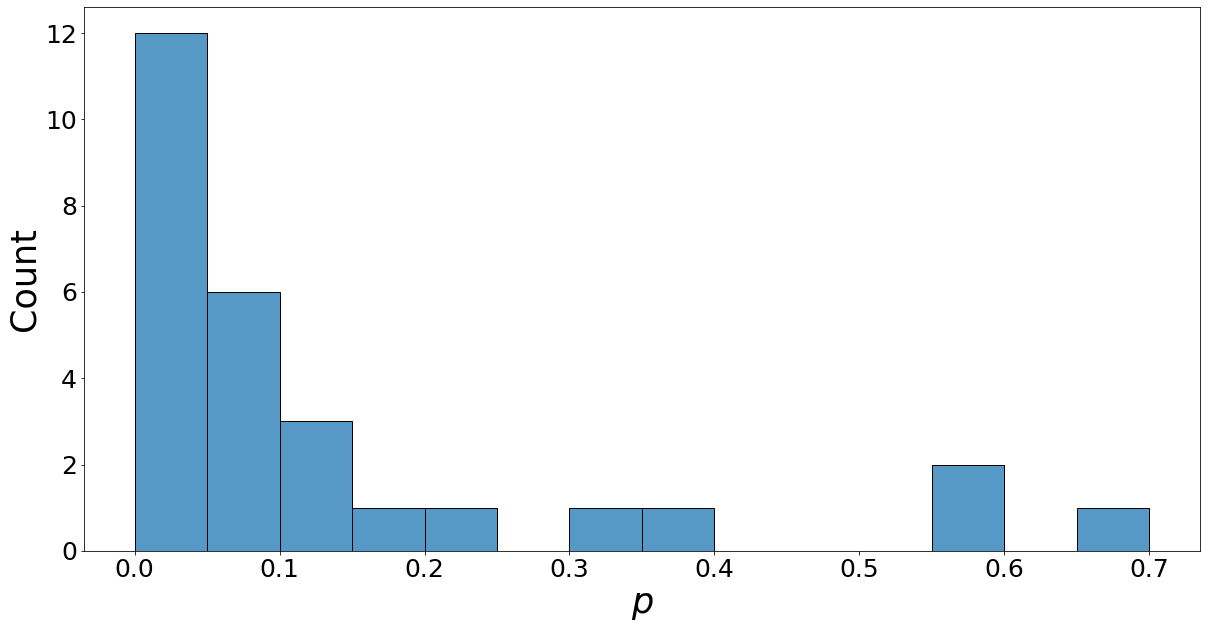

In [2]:
p_value = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/cis_mutations/p_values.csv', delimiter = '\t', index_col = 'Unnamed: 0')
plt.figure(figsize = (20, 10))
sns.histplot(p_value['pval'], binwidth = 0.05)
plt.xlabel('p', fontsize = 35, fontstyle='italic')
plt.ylabel('Count', fontsize = 35)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.savefig('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/cis_mutations/distribution_of_pval.eps', format = 'eps', dpi = 600, bbox_inches = 'tight')
plt.savefig('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/cis_mutations/distribution_of_pval.pdf', format = 'pdf', dpi = 600, bbox_inches = 'tight')

# Distribution of the expression change of potential <i>cis</i> mutations

In [2]:
CC2344 = ["CC2344-L1", "CC2344-L2", "CC2344-L3", "CC2344-L4", "CC2344-L5", "CC2344-L6", "CC2344-L7", "CC2344-L8", "CC2344-L9", "CC2344-L10", "CC2344-L11", "CC2344-L12", "CC2344-L13", "CC2344-L14", "CC2344-L15"]
CC2931 = ["CC2931-L1", "CC2931-L2", "CC2931-L3", "CC2931-L4", "CC2931-L5", "CC2931-L6", "CC2931-L7", "CC2931-L9", "CC2931-L10", "CC2931-L11", "CC2931-L13", "CC2931-L14", "CC2931-L15"]

#### Importing the annotation of genes in version 6 reference genome ####
type_gene = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/annotation/v6_genes.csv', delimiter = '\t')

#### List of differentially expressed genes ####
DEGs = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/total_genes1.csv', delimiter = ',').reset_index()
DEGs = pd.melt(DEGs, id_vars = ['index'], value_vars = CC2344 + CC2931).dropna()
DEGs = DEGs.set_index('value').join(type_gene.set_index('attributes'))

#### Importing the annotation of genes in version 6 reference genome ####
type_gene = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/annotation/v6_genes.csv', delimiter = '\t')

### Importing all mutations per MA sample ####
mutations = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/all_mutations.csv', delimiter = '\t')

In [3]:
flank = 100
near_DEGs = pd.DataFrame()
for MAline in DEGs['variable'].unique():
    mut = mutations.loc[mutations['sample'] == MAline]
    degs = DEGs.loc[DEGs['variable'] == MAline].reset_index()
    for chrom in degs['seq_id'].unique():
        mut_1 = mut.loc[mut['chromosome'] == chrom]
        degs_1 = degs.loc[degs['seq_id'] == chrom]
        for index in degs_1.index.values:
            bounds_start = degs_1.at[index, 'start'] - flank
            bounds_end = degs_1.at[index, 'end'] + flank
            mut_2 = mut_1.loc[(mut_1['gene_start'] >= bounds_start) & (mut_1['gene_end'] <= bounds_end) | (mut_1['gene_start'] >= bounds_start) & (mut_1['gene_start'] <= bounds_end) | (mut_1['gene_end'] >= bounds_start) & (mut_1['gene_end'] <= bounds_end)]
            if len(mut_2) != 0:
                near_DEGs.at[MAline + '_' + degs_1.at[index, 'level_0'], 'degs'] = degs_1.at[index, 'level_0']

near_DEGs = near_DEGs.reset_index()
near_DEGs['index'] = near_DEGs['index'].str.split('_', expand = True)[0]

<AxesSubplot:xlabel='L2F', ylabel='Count'>

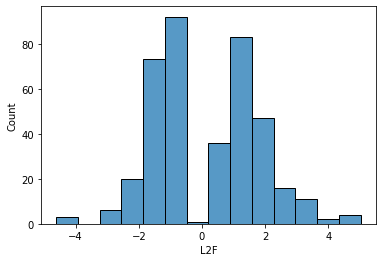

In [4]:
CC2344_L2F = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/raw_counts/CC2344_log2Fold', delimiter = '\t', index_col = 'Unnamed: 0')
CC2931_L2F = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/raw_counts/CC2931_log2Fold', delimiter = '\t', index_col = 'Unnamed: 0')

for i in near_DEGs.index.values:
    if 'CC2344' in near_DEGs.at[i, 'index']:
        near_DEGs.at[i, 'L2F'] = CC2344_L2F.at[near_DEGs.at[i, 'degs'], near_DEGs.at[i, 'index']]
    if 'CC2931' in near_DEGs.at[i, 'index']:
        near_DEGs.at[i, 'L2F'] = CC2931_L2F.at[near_DEGs.at[i, 'degs'], near_DEGs.at[i, 'index']]
        
sns.histplot(near_DEGs['L2F'])